In [3]:
import instrument_recognition as ir

dm = ir.datasets.DataModule('mdb-solos', use_augmented=False)
dm.setup()

 58%|█████▊    | 3392/5843 [00:00<00:00, 33915.50it/s]

loading metadata from /home/hugo/lab/instrument-recognition/data/mdb-solos/train...


  0%|          | 0/12236 [00:00<?, ?it/s]

found 5843 entries
{'piano': 2402, 'violin': 2041, 'clarinet': 251, 'flute': 155, 'tenor saxophone': 123, 'distorted electric guitar': 404, 'trumpet': 149, 'female singer': 318}
loading metadata from /home/hugo/lab/instrument-recognition/data/mdb-solos/test...


100%|██████████| 3494/3494 [00:00<00:00, 30749.68it/s]


found 12236 entries
{'clarinet': 732, 'piano': 2609, 'violin': 2900, 'tenor saxophone': 325, 'flute': 3167, 'distorted electric guitar': 955, 'female singer': 1142, 'trumpet': 406}
loading metadata from /home/hugo/lab/instrument-recognition/data/mdb-solos/validation...
found 3494 entries
{'clarinet': 328, 'piano': 1022, 'flute': 233, 'female singer': 284, 'tenor saxophone': 29, 'violin': 1031, 'distorted electric guitar': 495, 'trumpet': 72}
train entries: 5843
val entries: 3494


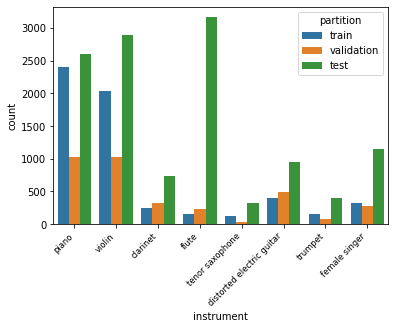

In [26]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

records = []
for partition, dataset in (('train', dm.train_data), 
                      ('validation', dm.val_data),
                      ('test', dm.test_data)):
    
    for instrument, freq in dataset.get_class_frequencies().items():
        records.append({
            'instrument': instrument, 
            'count': freq, 
            'partition': partition})
        
df = pd.DataFrame(records)

partition = 'test'

sns.barplot(data=df, x='instrument', y='count', hue='partition')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='regular',
    fontsize='small'  
)
plt.savefig(f'{partition}.jpg', dpi=100, bbox_inches='tight')